In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

# Read Dataset

In [2]:
import pandas as pd 
df = pd.read_csv("amazon_alexa.csv")

In [3]:
df.head()

,reviews,sentiment
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


# Null values

In [4]:
df.isnull().sum()

reviews      0
sentiment    0
dtype: int64

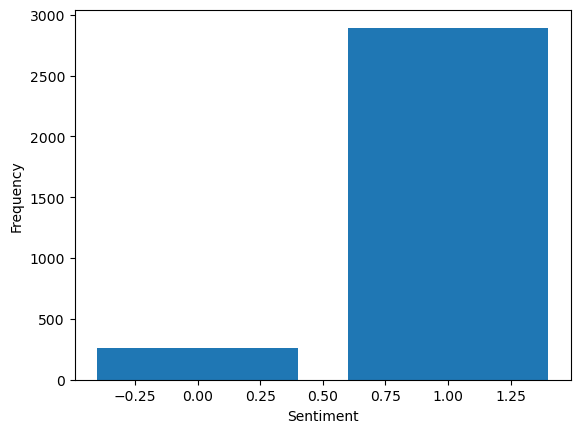

In [5]:
from collections import Counter

cs = Counter(df['sentiment'])
cs

plt.bar(cs.keys() , cs.values())
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

# Preprocessing

In [6]:
import nltk
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

Removing punctuations

In [7]:
#removing punctuations
df.replace('[^a-zA-Z]', ' ',regex = True,inplace = True)

In [8]:
df.head()

,reviews,sentiment
0,Love my Echo,1
1,Loved it,1
2,Sometimes while playing a game you can answer...,1
3,I have had a lot of fun with this thing My ...,1
4,Music,1


Converting to lowercase

In [9]:
#converting to lowercase
df['reviews'] = df['reviews'].str.lower()

In [39]:
#tokenization
# revs = df['reviews']
# for i in range (len(revs)):
#     revs[i] = nltk.word_tokenize(df["reviews"][i])
# df['reviews']=revs 

Tokenization

In [10]:
# tokensization
df['reviews'] = df['reviews'].apply(str.split)

In [11]:
df['reviews']

0                                        [love, my, echo]
1                                             [loved, it]
2       [sometimes, while, playing, a, game, you, can,...
3       [i, have, had, a, lot, of, fun, with, this, th...
4                                                 [music]
                              ...                        
3145    [perfect, for, kids, adults, and, everyone, in...
3146    [listening, to, music, searching, locations, c...
3147    [i, do, love, these, things, i, have, them, ru...
3148    [only, complaint, i, have, is, that, the, soun...
3149                                               [good]
Name: reviews, Length: 3150, dtype: object

Removing Stopwords

In [12]:
# removing stopwords

def removeStopwords(sentence) :
    for word in sentence:
        if word in stopwords.words('english'):
            sentence.remove(word)
    return sentence

df['reviews'] = df['reviews'].apply(removeStopwords)

In [13]:
df['reviews']

0                                            [love, echo]
1                                                 [loved]
2       [sometimes, playing, game, can, answer, questi...
3       [have, a, lot, fun, this, thing, yr, old, lear...
4                                                 [music]
                              ...                        
3145           [perfect, kids, adults, everyone, between]
3146    [listening, music, searching, locations, check...
3147    [do, love, things, have, running, entire, home...
3148    [complaint, sound, quality, great, mostly, use...
3149                                               [good]
Name: reviews, Length: 3150, dtype: object

Stemming

In [14]:
stemmer = PorterStemmer()
for rev in df['reviews']:
    for w in range (len(rev)):
        rev[w] = stemmer.stem(rev[w])


In [15]:
df.head()

,reviews,sentiment
0,"[love, echo]",1
1,[love],1
2,"[sometim, play, game, can, answer, question, c...",1
3,"[have, a, lot, fun, thi, thing, yr, old, learn...",1
4,[music],1


# Oversampling

In [16]:
df_class_0 = df[df['sentiment'] == 0]
df_class_1 = df[df['sentiment'] == 1]
df_class_0.shape
df_class_1.shape
df_oversample_0 = df_class_0.sample(2893,replace = True)
new_df_column = pd.concat([df_oversample_0, df_class_1], axis = 0)

print(new_df_column)

                                                reviews  sentiment
1227          [product, turn, randomli, sometim, night]          0
1118          [returnef, item, it, not, speak, spanish]          0
1602  [return, repair, repair, done, ha, problem, re...          0
2098  [got, month, ago, idea, help, control, smart, ...          0
1625  [famili, bought, sever, help, commun, older, p...          0
...                                                 ...        ...
3145            [perfect, kid, adult, everyon, between]          1
3146  [listen, music, search, locat, check, time, lo...          1
3147  [do, love, thing, have, run, entir, home, tv, ...          1
3148  [complaint, sound, qualiti, great, mostli, use...          1
3149                                             [good]          1

[5786 rows x 2 columns]


# TF-IDF Vectorizer

In [17]:
# tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer=lambda x: x)
X = vectorizer.fit_transform(new_df_column['reviews'])

In [18]:
print(X)

  (0, 1672)	0.4766747665295521
  (0, 2324)	0.5172349643252913
  (0, 1992)	0.5347048673451884
  (0, 2650)	0.36645763831631184
  (0, 1938)	0.29163103879801194
  (1, 2350)	0.526768276363395
  (1, 2353)	0.41063037185573514
  (1, 1690)	0.24067465545217157
  (1, 1341)	0.19707903229852058
  (1, 1345)	0.3486868476074048
  (1, 2098)	0.5792675791753119
  (2, 1894)	0.18803849025590688
  (2, 1829)	0.17831479915906567
  (2, 2843)	0.0763092558141203
  (2, 2376)	0.1359593977731952
  (2, 783)	0.08018425753956093
  (2, 0)	0.08252073543801679
  (2, 1142)	0.08887350073973502
  (2, 1230)	0.07619277629420458
  (2, 1789)	0.2141229788655221
  (2, 2530)	0.13430176871737987
  (2, 506)	0.2037645126945029
  (2, 2587)	0.09452148431873154
  (2, 1750)	0.16945836260601016
  (2, 1679)	0.14030257301464963
  :	:
  (5784, 739)	0.11832083268305374
  (5784, 1971)	0.2284479250935691
  (5784, 2340)	0.08952161289090418
  (5784, 2529)	0.21365412806135867
  (5784, 2481)	0.07979581528565832
  (5784, 126)	0.12226330880283014
  (

In [19]:
y = new_df_column['sentiment']

In [20]:
y

1227    0
1118    0
1602    0
2098    0
1625    0
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: sentiment, Length: 5786, dtype: int64

In [21]:
TEST_SIZE = 0.2
RANDOM_STATE = 15

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state = RANDOM_STATE)


# Machine Learning Models

Multinomial Naive Bayes Classification

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       582
           1       0.88      0.91      0.89       576

    accuracy                           0.89      1158
   macro avg       0.89      0.89      0.89      1158
weighted avg       0.89      0.89      0.89      1158



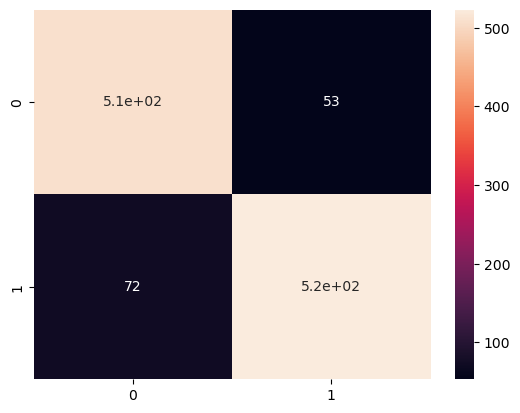

In [22]:
from sklearn.naive_bayes import MultinomialNB 
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)

nb_pred = NB_classifier.predict(X_test)

cm = confusion_matrix(nb_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, nb_pred))

Logistic Regression


              precision    recall  f1-score   support

           0       0.90      1.00      0.95       582
           1       1.00      0.89      0.94       576

    accuracy                           0.94      1158
   macro avg       0.95      0.94      0.94      1158
weighted avg       0.95      0.94      0.94      1158



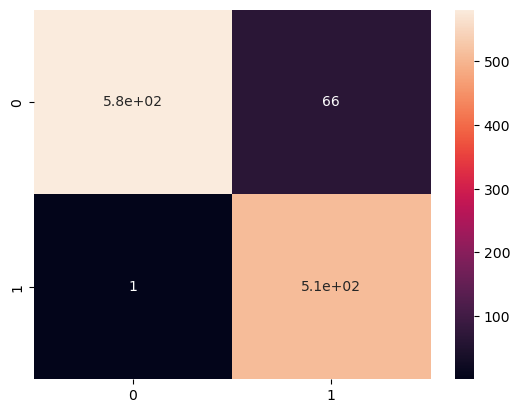

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

lr_pred = model.predict(X_test)

cm = confusion_matrix(lr_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, lr_pred))

KNN

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       582
           1       1.00      0.39      0.56       576

    accuracy                           0.69      1158
   macro avg       0.81      0.69      0.66      1158
weighted avg       0.81      0.69      0.66      1158



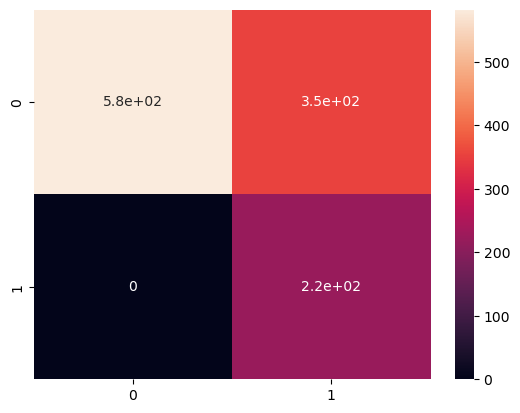

In [24]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

knn_pred = knn.predict(X_test)

cm = confusion_matrix(knn_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, knn_pred))

Logistic Regression and Multinomial Naive Bayes are recommended as high accuracy is obtained.